In [ ]:
# Perry H. Zhang perry.h.zhang.24@dartmouth.edu
# the program used to calculate the scores for our model

In [1]:
!pip install shapely
!pip install geopandas
!pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [2]:
from shapely.geometry import Polygon, Point, LineString
import pandas as pd
import shapely.geometry as sg
import shapely.ops as so
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import geopandas as gpd
import math 
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import glob
import pprint

In [3]:
######## Figuring out which method we want to use to plot the graphs

<AxesSubplot:>

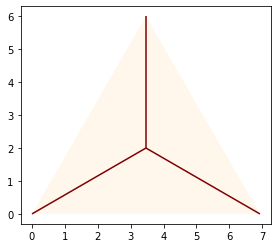

In [4]:
# method to plot the triangle 1

triangle = Polygon([(0,0),
                    (4*math.sqrt(3),0),
                    (2*math.sqrt(3),6),
                    ])

line_1 = LineString([(2*math.sqrt(3),6),
                    (2*math.sqrt(3),2)
                    ])

line_2 = LineString([(2*math.sqrt(3),2),
                    (4*math.sqrt(3),0)
                    ])

line_3 = LineString([(0,0),
                    (2*math.sqrt(3),2)
                    ])

line_cmap = ListedColormap(['red'], name='allred')

d = {'col1': ['triangle', 'line_1', 'line_2', 'line_3'], 
     'geometry': [triangle, line_1, line_2, line_3],
     'colors': [0.6,1,1,1]}
gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")

# tri = gpd.GeoSeries(polygon1)

# l1 = gpd.GeoSeries(line_1)

# l2 = gpd.GeoSeries(line_2)

# l3 = gpd.GeoSeries(line_3)

# plt.show()

gdf.plot(column='colors', cmap='OrRd')

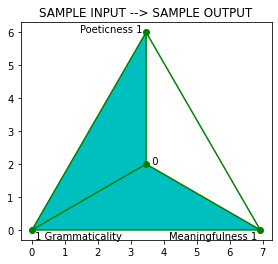

In [5]:
# method to plot the triangle 2
   
# Create triangulation.
x = np.asarray([0, 4*math.sqrt(3), 2*math.sqrt(3), 2*math.sqrt(3)])
  
y = np.asarray([0, 0, 2, 6])
  
triangles = [[0, 1, 2],[3,0,2],[3,2,1]]
  
triang = mtri.Triangulation(x, y, triangles)
# z = np.cos(1.5 * x) * np.cos(1.5 * y)
   
#plt.tricontourf(triang, z)
plt.triplot(triang, 'go-')
   
plt.title('SAMPLE INPUT --> SAMPLE OUTPUT')
plt.axis('scaled')

# text is left-aligned
plt.text(2*math.sqrt(3),2,'  0')

plt.text(0,-0.266,' 1 Grammaticality')
plt.text(4*math.sqrt(3),-0.266,'Meaningfulness 1 ',horizontalalignment='right')
plt.text(2*math.sqrt(3),6,'Poeticness 1 ',horizontalalignment='right')

plt.fill(x, y, "c")

plt.show()

In [6]:
######## After considering the two methods, I decided to use the second one. We will now define functions

In [7]:
# three functions to transfer the decimals to coordinates
def get_meaningfulness_coord(decimal):
    return ((1+decimal)*2*math.sqrt(3),(1-decimal)*2)

def get_grammaticality_coord(decimal):
    return ((1-decimal)*2*math.sqrt(3),(1-decimal)*2)

def get_poeticness_coord(decimal):
    return (2*math.sqrt(3),2+decimal*4)

In [8]:
# function to get the area of the triangle
def get_triangle_area(tuple_1,tuple_2,tuple_3):
    return Polygon([tuple_1,tuple_2,tuple_3]).area

# function to get b
def get_b(poeticness, meaningfulness, grammaticality):
    inner_triangle_area = get_triangle_area(get_poeticness_coord(poeticness),get_meaningfulness_coord(meaningfulness),get_grammaticality_coord(grammaticality))
    return inner_triangle_area/(12*math.sqrt(3))

In [9]:
# function to produce a graph 

def produce_graph(form_number, subject_number, question_number, is_gen, poeticness, meaningfulness, grammaticality,screenshot_filename):
    
    # method to plot the triangle 2
    # Create triangulation.
    x = np.asarray([0, 4*math.sqrt(3), 2*math.sqrt(3), 2*math.sqrt(3)])
    y = np.asarray([0, 0, 2, 6])
    # listing all the triangles
    triangles_base = [[0, 1, 2],[3,0,2],[3,2,1]]
    # create the traingualation
    triang_base = mtri.Triangulation(x, y, triangles_base)
    
    # coordinates used to fill the evaluating triangle 
    x_fill = np.asarray([get_poeticness_coord(poeticness)[0], get_meaningfulness_coord(meaningfulness)[0], get_grammaticality_coord(grammaticality)[0]])
    y_fill = np.asarray([get_poeticness_coord(poeticness)[1], get_meaningfulness_coord(meaningfulness)[1], get_grammaticality_coord(grammaticality)[1]])
    # listing all the triangles
    triangle_fill = [[0, 1, 2]]
    # create the traingualation
    triang_fill = mtri.Triangulation(x_fill, y_fill, triangle_fill)
    
    # type of lyric
    lyric_type = ''
    if is_gen == False:
        lyric_type = 'Real'
    else:
        lyric_type = 'Generated'
    
    # get inner triangle area
    inner_triangle_area = get_triangle_area(get_poeticness_coord(poeticness),get_meaningfulness_coord(meaningfulness),get_grammaticality_coord(grammaticality))
    
    #plot the basic two triangles    
    plt.triplot(triang_base, 'go-', label='Ideal Collate Triangle \narea='+str(12*math.sqrt(3)))
    plt.triplot(triang_fill, 'bo-', label='Current Lyric Collate Triangle ('+lyric_type+') \narea='+str(inner_triangle_area))
    # fill in the internal triangle
    plt.fill(x_fill, y_fill, "c")
    
    
    #plot the title and make sure the graph is scaled
    plt.title('Survey '+str(form_number)+', Subject '+str(subject_number)+', Lyric '+str(question_number)+' Collate Triangle ('+lyric_type+')')
    plt.axis('scaled')

    # text part 1
    plt.text(2*math.sqrt(3),2,'  0')
    plt.text(0,-0.266,' 1 Grammaticality')
    plt.text(4*math.sqrt(3),-0.266,'Meaningfulness 1 ',horizontalalignment='right')
    plt.text(2*math.sqrt(3),6,'Poeticness 1 ',horizontalalignment='right')
    
    # text part 2
    plt.text(get_poeticness_coord(poeticness)[0],get_poeticness_coord(poeticness)[1],str(poeticness),horizontalalignment='right', c='b')
    plt.text(get_meaningfulness_coord(meaningfulness)[0],get_meaningfulness_coord(meaningfulness)[1],str(meaningfulness), c='b')
    plt.text(get_grammaticality_coord(grammaticality)[0],get_grammaticality_coord(grammaticality)[1],str(grammaticality), horizontalalignment='right', c='b')
    
    # legend
    # start plotting the legenf
    ax = plt.subplot(111)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)
    
    # finally, show the ratio
    b = get_b(poeticness, meaningfulness, grammaticality)
    plt.text(7,5.8,'b: '+f'{b:.3f}', horizontalalignment='right')
    
    # check to see if the filename is null, if it is don't save anything
    if screenshot_filename != None:
        figure = plt.gcf()
        figure.savefig(screenshot_filename, dpi=300)
    
    # finally, show the plot
    plt.show()

        

<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


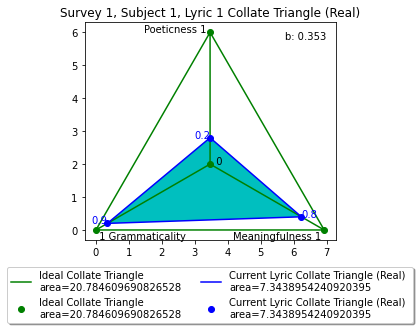

In [10]:
# Then, we can take the mean of the M scores for the set of generated lyrics (let this be Mg) 
# - and take the mean for the M scores for the set of real lyrics (let this be Mr). Then, the 
# final quality of our model can be defined as M =Mg/Mr.  With this score, we can say that “the 
# model can replicate real lyrics with approximately M% believability”.

produce_graph(1,1,1,False,0.2,0.8,0.9,None)


In [11]:
######## Actual reading from file 

In [12]:
# define the list of means
list_of_scores_overall_REAL = []
list_of_scores_overall_GEN = []

list_of_scores_a_REAL = []
list_of_scores_a_GEN = []

list_of_scores_b_REAL = []
list_of_scores_b_GEN = []

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


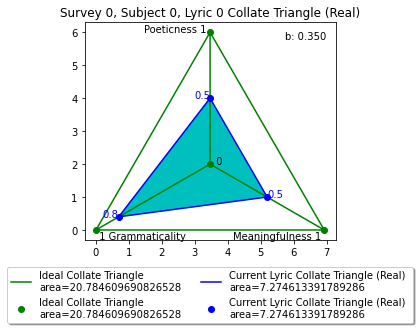

1.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


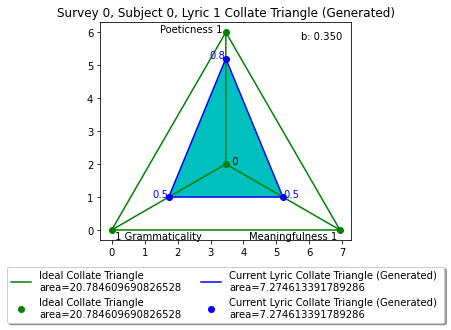

2.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


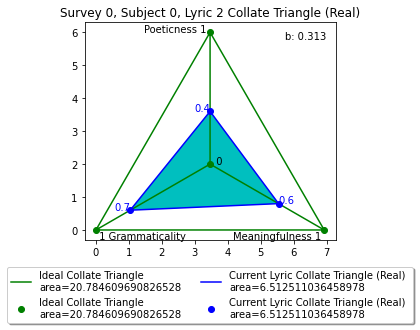

3.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


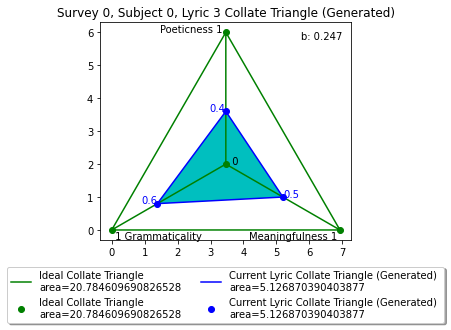

4.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


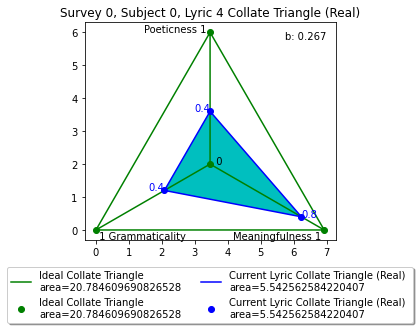

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


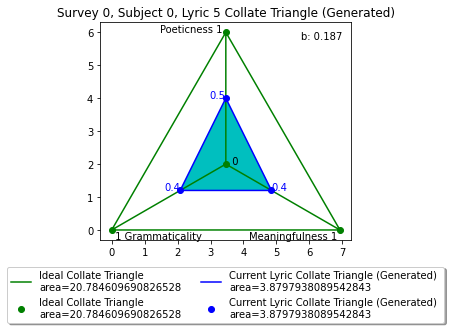

0.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


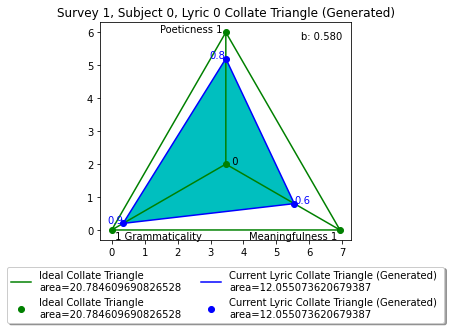

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


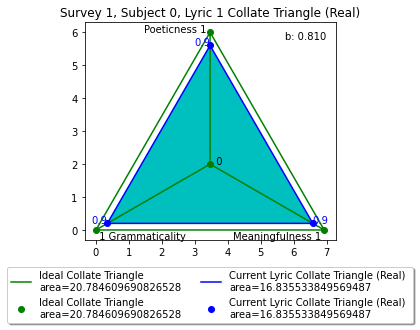

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


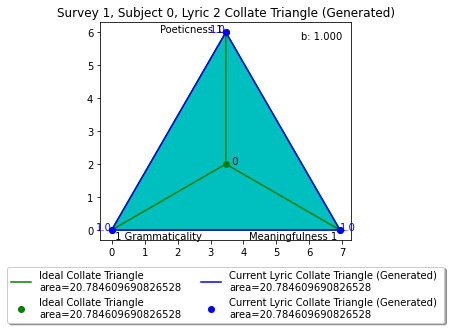

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


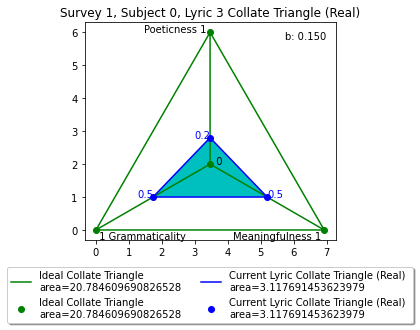

4.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


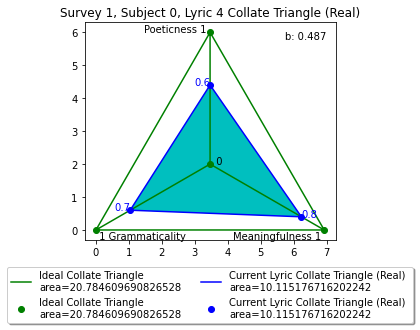

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


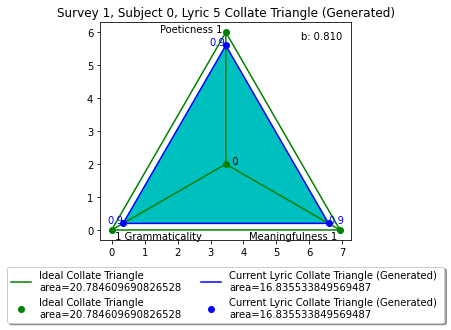

0.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


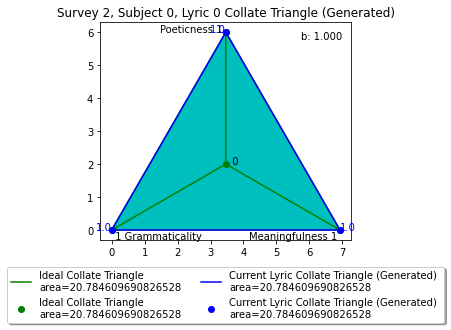

1.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


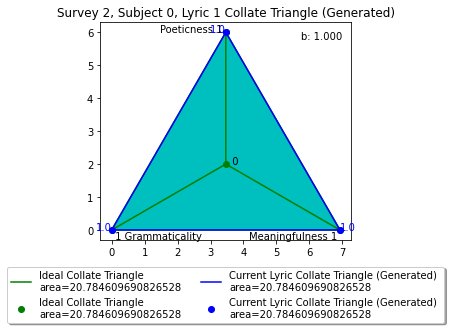

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


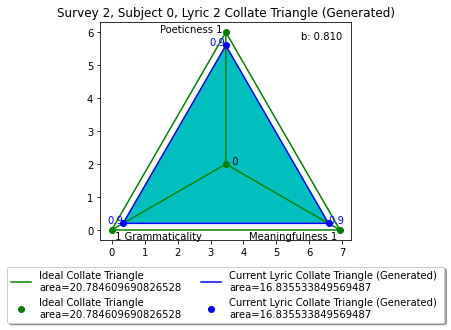

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


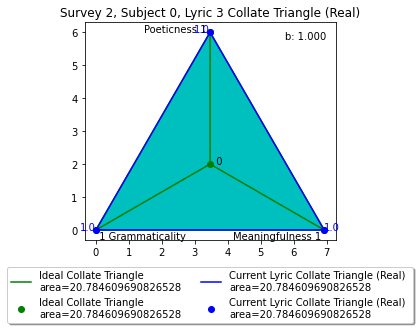

4.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


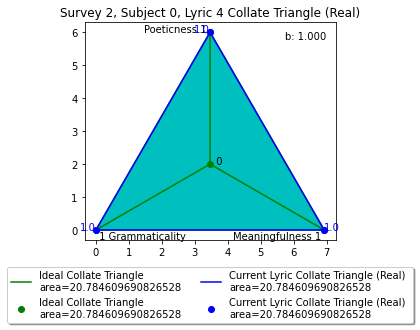

5.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


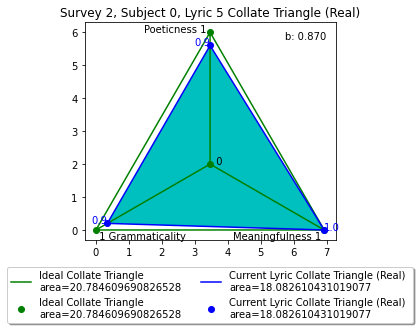

0.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


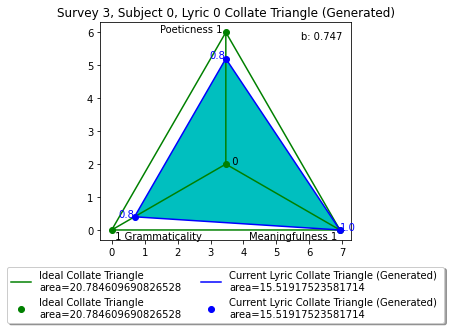

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


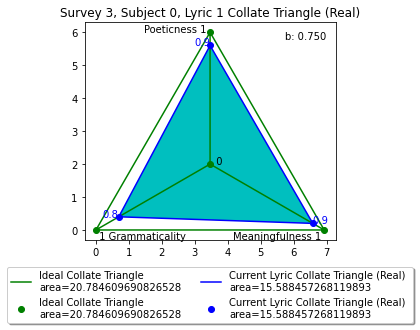

2.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


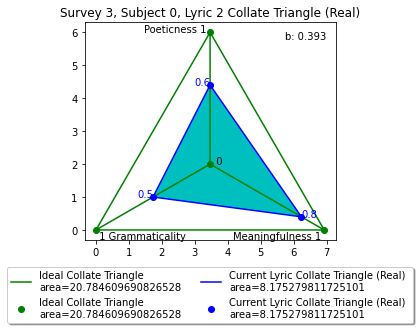

3.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


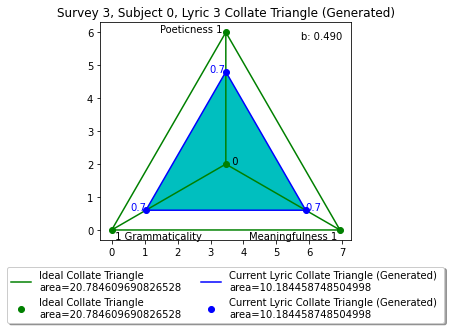

4.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


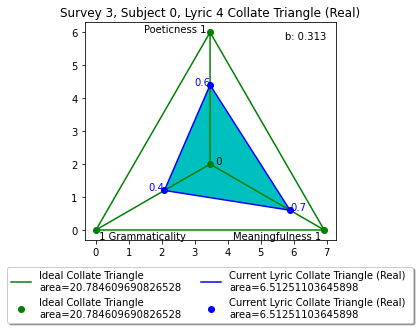

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


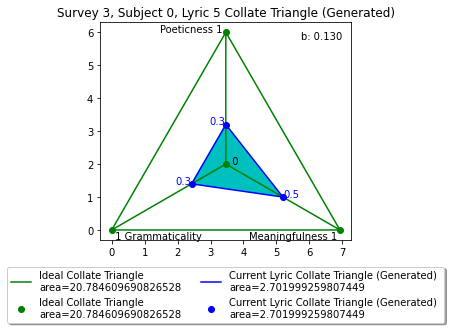

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


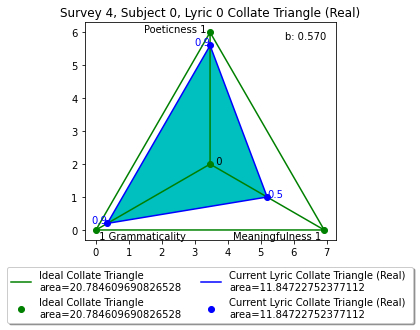

1.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


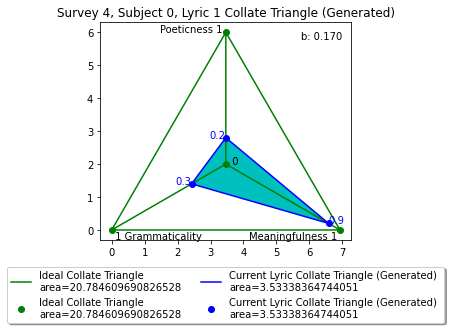

2.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


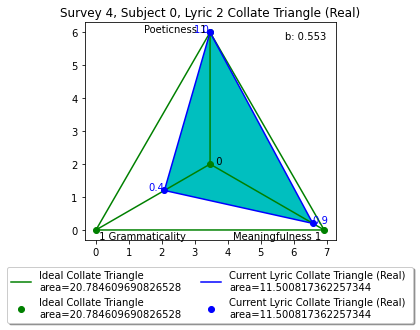

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


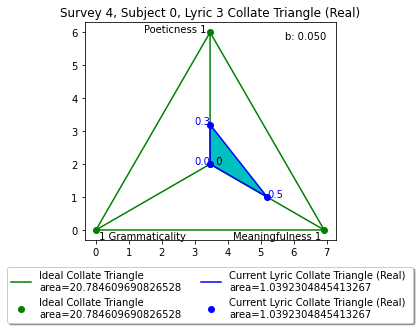

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


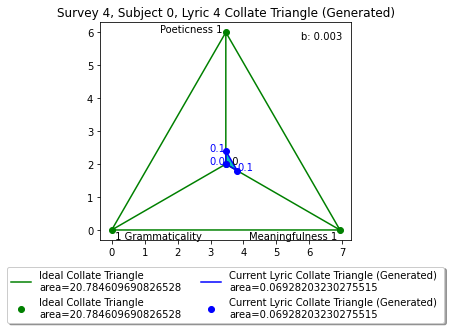

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


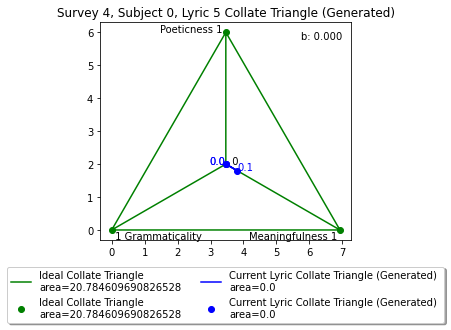

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


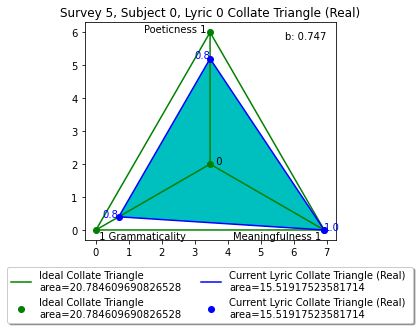

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


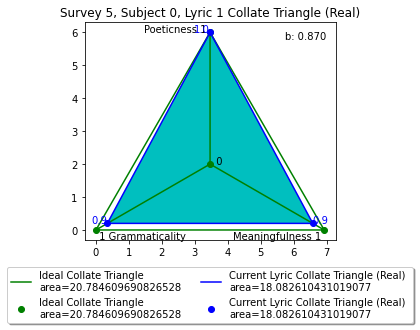

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


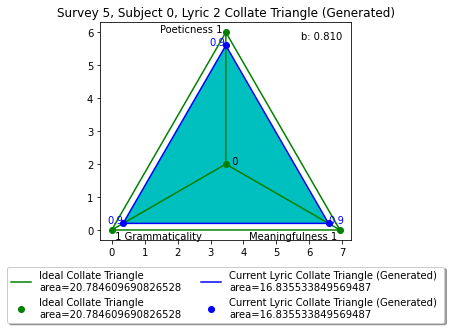

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


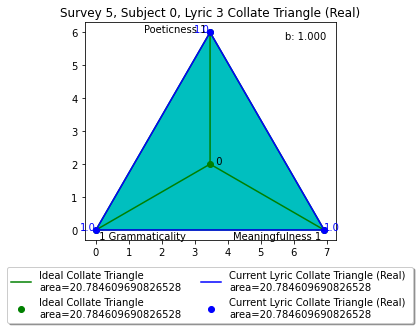

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


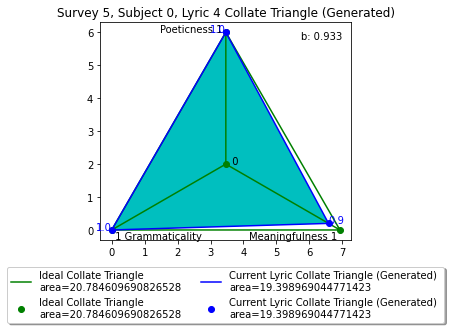

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


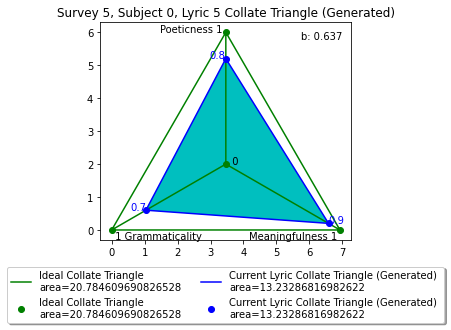

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


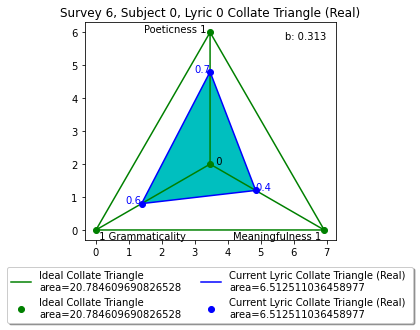

1.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


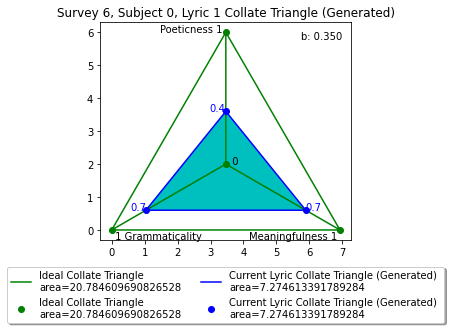

2.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


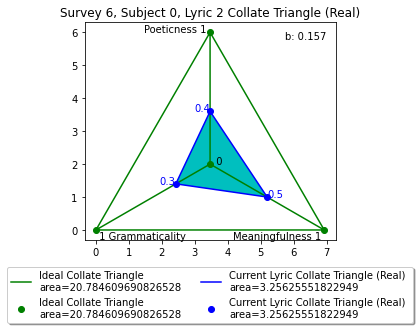

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


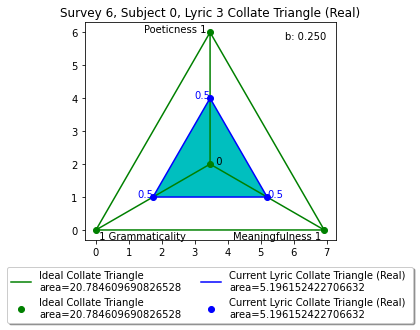

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


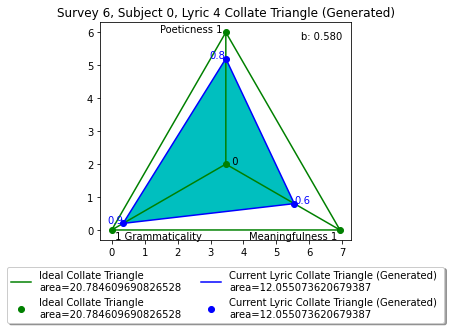

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


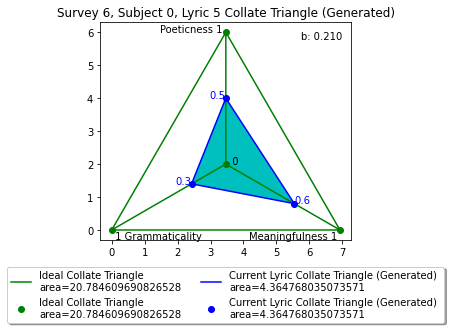

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


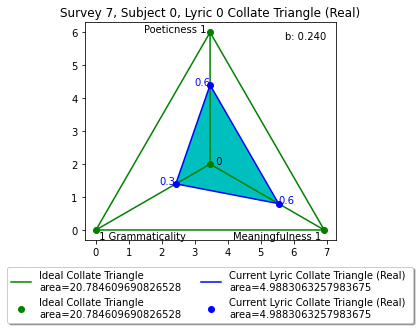

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


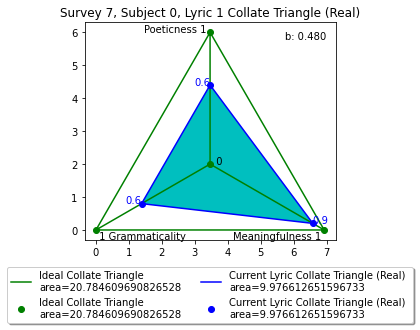

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


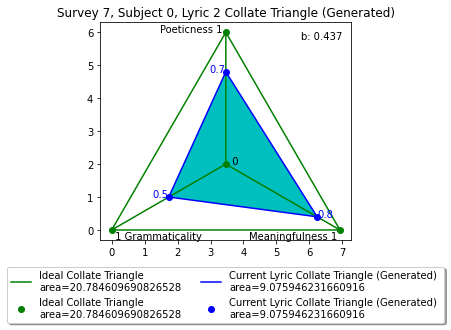

3.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


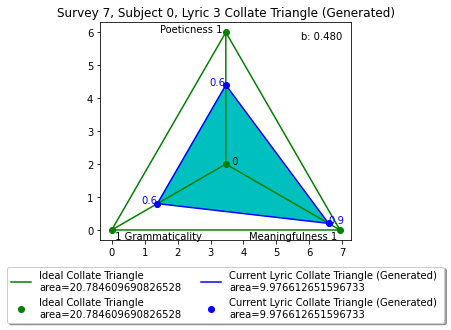

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


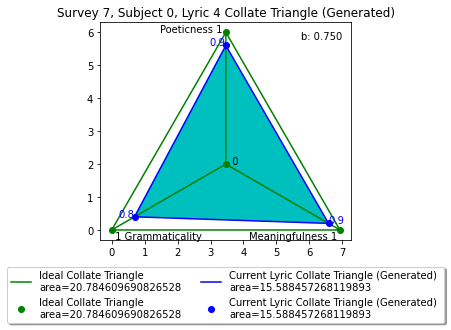

5.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


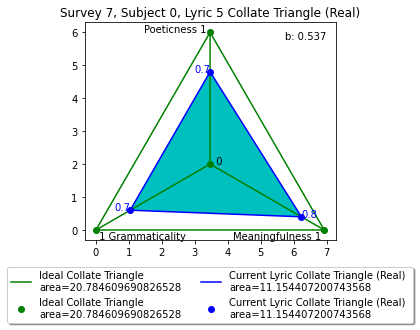

0.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


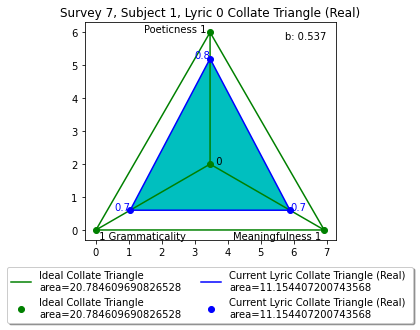

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


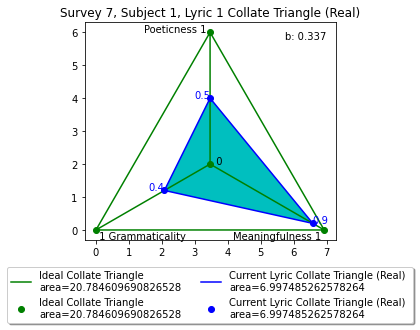

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


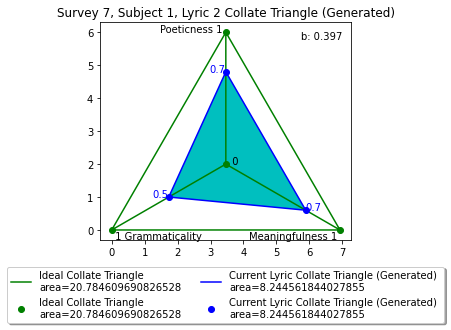

3.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


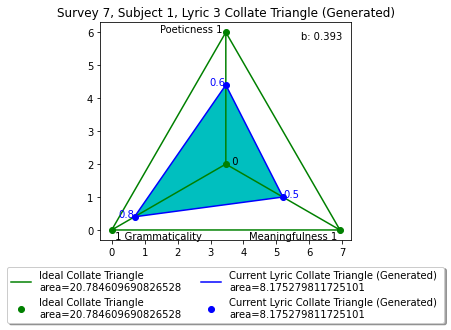

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


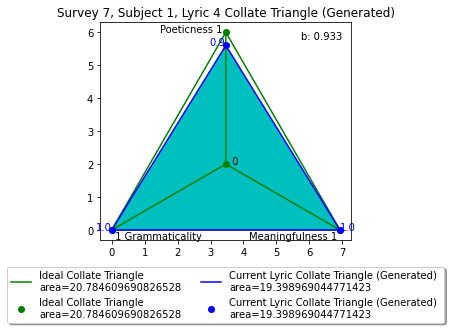

5.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


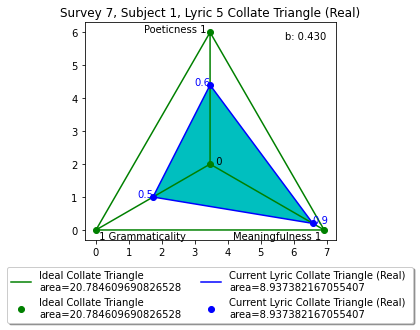

0.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


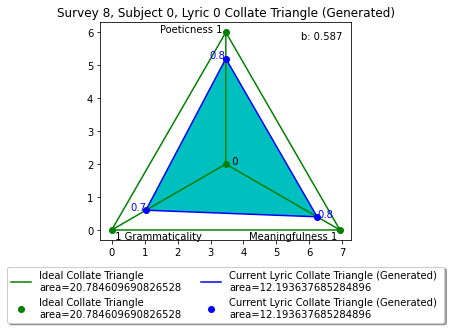

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


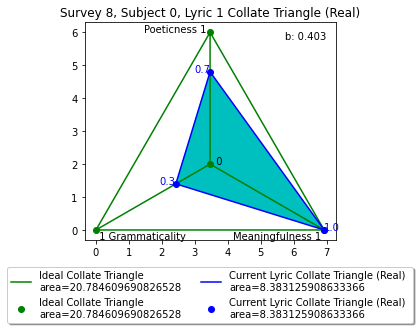

2.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


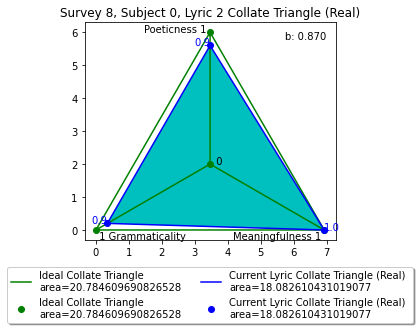

3.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


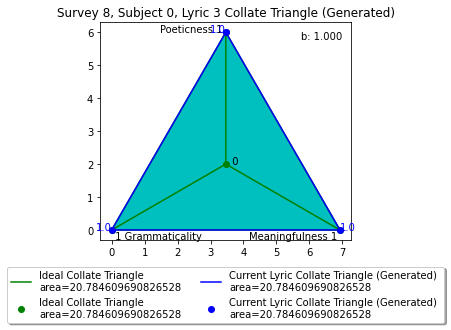

4.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


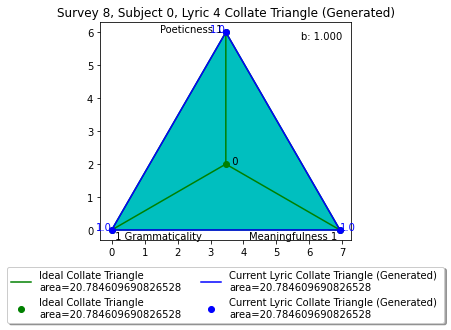

5.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


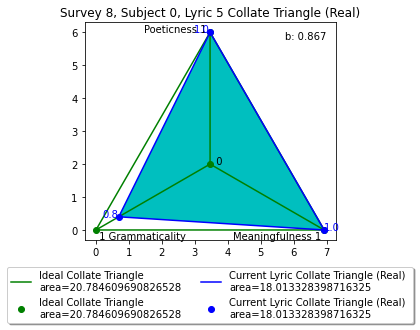

0.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


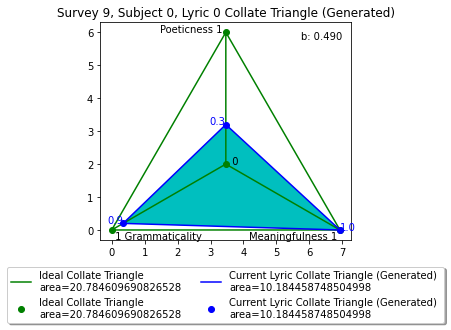

1.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


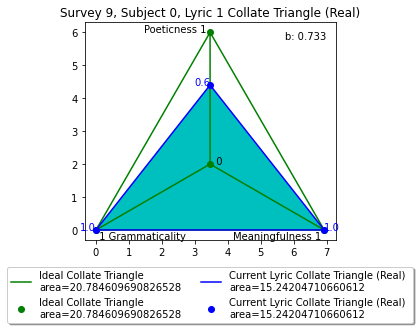

2.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


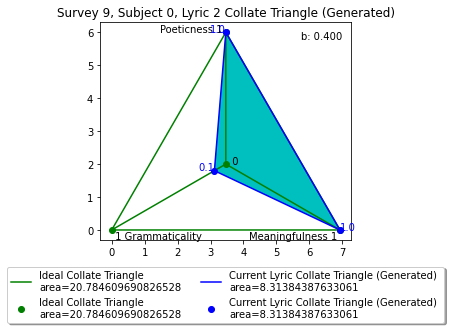

3.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


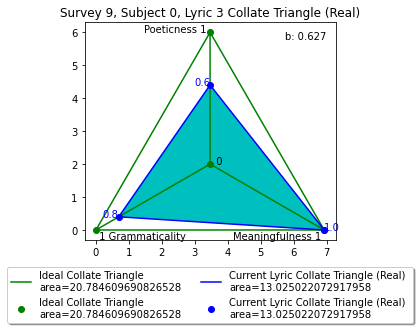

4.0
[REAL]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


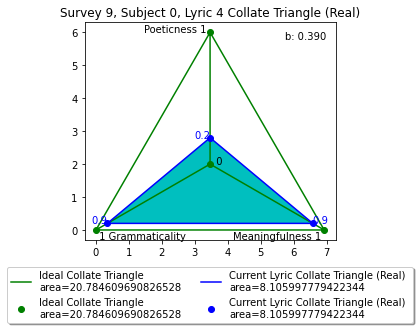

5.0
[GEN]


<ipython-input-9-8ffd5a80ec87>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


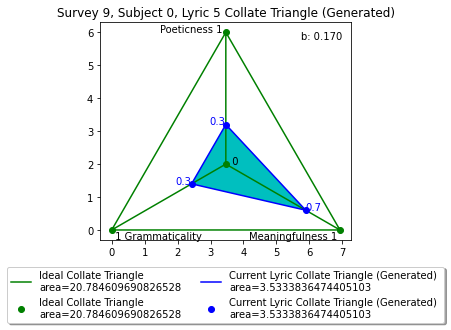

In [13]:
# first get all the files

for form_number in range(10):
    #survey
    curr_survey_dir = "Survey_"+str(form_number)
    curr_survey_dir_filepaths = glob.glob(curr_survey_dir+"/*.csv")
    
    #survey output
    curr_survey_output_dir = "Survey_"+str(form_number)+"_output"
    
    #answers
    curr_answer_filepath = "survey_"+str(form_number)+".txt"
    
    #read the answer lines
    curr_answer_file = open(curr_answer_filepath, 'r')
    curr_answer_lines = curr_answer_file.readlines()
    curr_answer_file.close()
        
    
    for filepath in curr_survey_dir_filepaths:
        response_df = pd.read_csv(filepath)
        
        #for each row (subject)
        for subject_number in range(len(response_df.axes[0])):
            
            #for each 4 columns (lyric)
            for col in range(2,len(response_df.axes[1]),4):
                
                print((col-2)/4)
                
                #the current lyric
                curr_lyric_position = int((col-2)/4)
                
                #get the lyric line
                curr_lyric = curr_answer_lines[curr_lyric_position]
                
                #check to see if the lyric is real or generated
                lyric_type = ""
                print(curr_lyric.split()[0])
                if curr_lyric.split()[0] != "[GEN]":
                    lyric_type = 'Real'
                    is_gen = False
                else:
                    lyric_type = 'Generated'
                    is_gen = True
                    
                # get the three parameters for b
                poeticness = response_df.iloc[subject_number,col+1]/10
                meaningfulness = response_df.iloc[subject_number,col+2]/10
                grammaticality = response_df.iloc[subject_number,col+3]/10
                
                # get a and b
                a = response_df.iloc[subject_number,col]/10
                b = get_b(poeticness,meaningfulness,grammaticality)
                
                #save screenshot name
                screenshot_filename = curr_survey_output_dir+'/Survey '+str(form_number)+', Subject '+str(subject_number)+', Lyric '+str(curr_lyric_position)+' Collate Triangle ('+lyric_type+').jpg'
                b_graph = produce_graph(form_number,subject_number,curr_lyric_position,is_gen,poeticness,meaningfulness,grammaticality,screenshot_filename)
                
                # append the values into the list
                if is_gen == True:
                    list_of_scores_overall_GEN.append(a*b)
                    list_of_scores_a_GEN.append(a)
                    list_of_scores_b_GEN.append(b)
                else:
                    list_of_scores_overall_REAL.append(a*b)
                    list_of_scores_a_REAL.append(a)
                    list_of_scores_b_REAL.append(b)


In [14]:
# calculating the final scores, as well as other information
mean_GEN = sum(list_of_scores_overall_GEN) / len(list_of_scores_overall_GEN)
mean_REAL = sum(list_of_scores_overall_REAL) / len(list_of_scores_overall_REAL)

final_score = mean_GEN/mean_REAL

pprint.pprint("GEN")
pprint.pprint(list_of_scores_a_GEN)
pprint.pprint(list_of_scores_b_GEN)
pprint.pprint("----------")
pprint.pprint("REAL")
pprint.pprint(list_of_scores_a_REAL)
pprint.pprint(list_of_scores_b_REAL)
pprint.pprint("----------")
pprint.pprint("FINAL")
pprint.pprint(mean_GEN)
pprint.pprint(mean_REAL)
pprint.pprint(final_score)

'GEN'
[0.5,
 0.5,
 0.3,
 0.8,
 0.9,
 0.9,
 1.0,
 1.0,
 0.8,
 0.8,
 0.8,
 0.5,
 0.5,
 1.0,
 0.0,
 1.0,
 0.9,
 0.8,
 0.3,
 0.7,
 0.6,
 0.6,
 0.5,
 0.8,
 0.8,
 0.8,
 0.9,
 0.7,
 1.0,
 0.9,
 0.8,
 0.9,
 0.4]
[0.35000000000000003,
 0.24666666666666665,
 0.18666666666666662,
 0.5800000000000001,
 1.0,
 0.8099999999999999,
 1.0,
 1.0,
 0.8099999999999999,
 0.7466666666666667,
 0.48999999999999994,
 0.13000000000000003,
 0.17,
 0.003333333333333336,
 0.0,
 0.8099999999999999,
 0.9333333333333332,
 0.6366666666666666,
 0.35,
 0.5800000000000001,
 0.21000000000000002,
 0.43666666666666665,
 0.48,
 0.7499999999999998,
 0.3966666666666666,
 0.3933333333333333,
 0.9333333333333332,
 0.5866666666666667,
 1.0,
 1.0,
 0.48999999999999994,
 0.39999999999999997,
 0.17]
'----------'
'REAL'
[0.6,
 0.8,
 0.3,
 0.9,
 0.2,
 0.6,
 1.0,
 1.0,
 1.0,
 0.9,
 0.7,
 0.6,
 0.8,
 0.7,
 0.3,
 0.9,
 0.8,
 1.0,
 0.7,
 0.6,
 0.5,
 0.7,
 0.8,
 0.7,
 0.7,
 0.5,
 0.9,
 0.6,
 0.6,
 0.8,
 0.6,
 0.9,
 0.5]
[0.35000000000000003

In [15]:
# additionally printing the means of GEN and REAL
pprint.pprint("GEN")
pprint.pprint(sum(list_of_scores_a_GEN)/len((list_of_scores_a_GEN)))
pprint.pprint(sum(list_of_scores_b_GEN)/len((list_of_scores_b_GEN)))
pprint.pprint("----------")
pprint.pprint("REAL")
pprint.pprint(sum(list_of_scores_a_REAL)/len((list_of_scores_a_REAL)))
pprint.pprint(sum(list_of_scores_b_REAL)/len((list_of_scores_b_REAL)))

'GEN'
0.718181818181818
0.547878787878788
'----------'
'REAL'
0.703030303030303
0.5352525252525252
